<a href="https://colab.research.google.com/github/Gonza2981/Trabajo-EDA/blob/main/Trabajo_EDA_Airplane_Crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo EDA- Airplane Crash

Importamos todas las librerias que vamos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Mounted at /content/drive


Cargamos el archivo csv con el que cremos el DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 1/Airplane_Crashes_and_Fatalities_Since_1908.csv', parse_dates=['Date','Time'])

Ejecutamos para ver que tipo de variables tiene el df y si tiene valores nulos

In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


Veamos la cantiad de filas y columnas que tiene el df

In [ ]:
df.shape[0]

5268

Observemos la cantidad de valores vacios por columna

In [ ]:
df.isna().sum()

Vemos las cantidad de valores vacios en porcentaje al total

In [ ]:
(df.isna().sum()/df.shape[0])*100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

Como es un df donde se analizan los accidentes aereos, eliminaremos los valores donde no hay datos Fatalities y  tampoco hay de Aboard. Igualmente ambos representan menos del 1% de los datos

In [ ]:
df = df.dropna(subset=['Fatalities','Aboard'])
(df.isna().sum()/df.shape[0])*100

Date             0.000000
Time            41.879527
Location         0.362181
Operator         0.343119
Flight #        79.660694
Route           32.195959
Type             0.476554
Registration     6.328631
cn/In           23.198628
Aboard           0.000000
Fatalities       0.000000
Ground           0.190621
Summary          7.300801
dtype: float64

Veamos cuantas variables numericas tenemos y cuantas categoricas

In [ ]:
lista_var_num = list(df.select_dtypes(include=np.number).columns)
lista_var_num

['Aboard', 'Fatalities', 'Ground']

In [ ]:
lista_var_cat = list(df.select_dtypes(include='object').columns)
lista_var_cat

['Time',
 'Location',
 'Operator',
 'Flight #',
 'Route',
 'Type',
 'Registration',
 'cn/In',
 'Summary']

#Analicemos la distribucion por cantidades de las variables categoricas

Analizamos la cantidad de accidentes por año

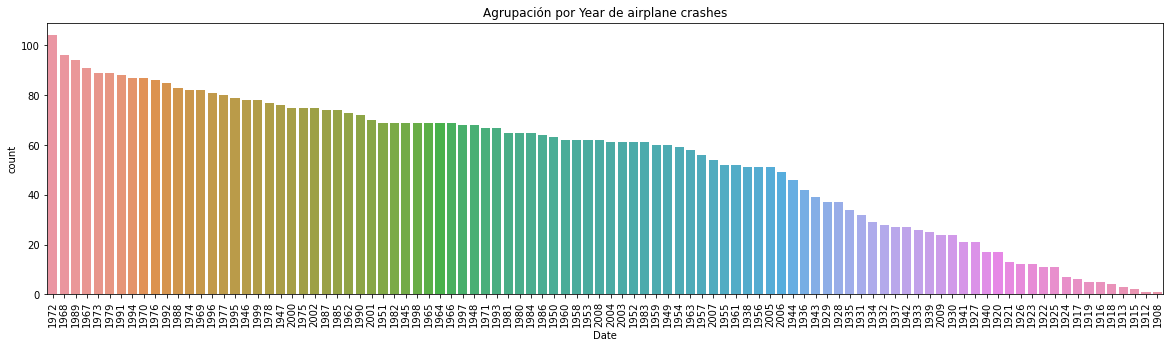

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df.Date.dt.year, order=df.Date.dt.year.value_counts().index)
plt.xticks(rotation=90)
plt.title(f'Agrupación por Year de airplane crashes')
plt.show()
    


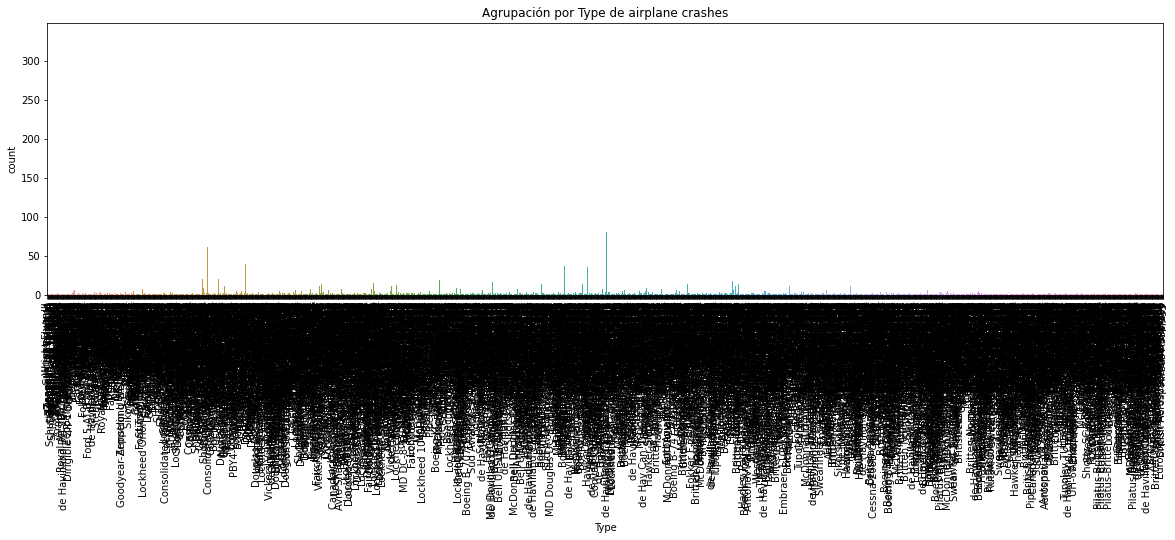

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df.Type)
plt.xticks(rotation=90)
plt.title(f'Agrupación por Type de airplane crashes')
plt.show()

Cunatos tipos de aviones distintos tuvieron accidentes?

In [ ]:
df.Type.nunique()

2439

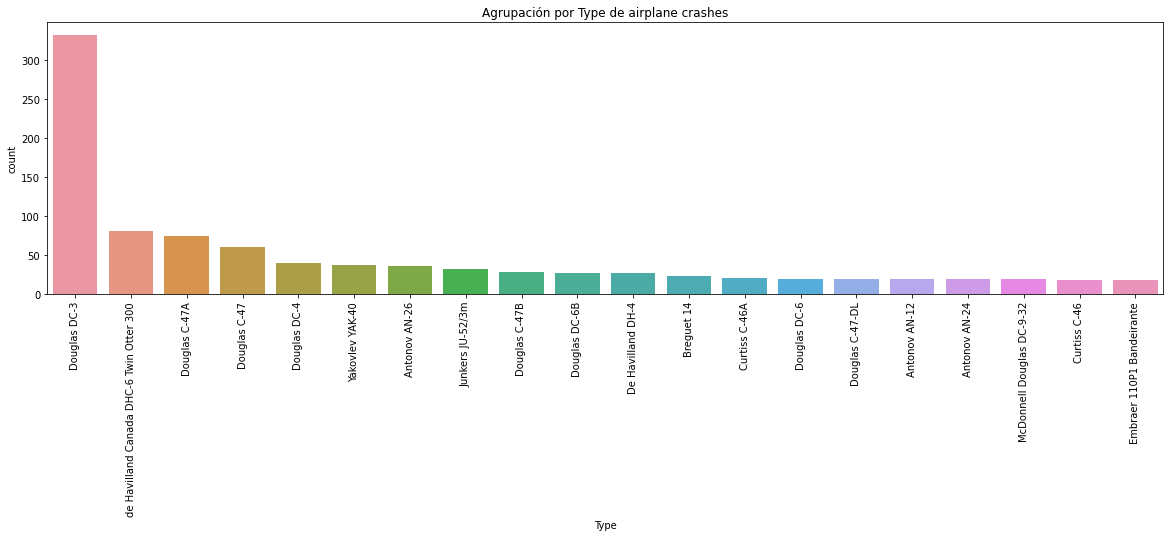

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df.Type,  order=df.Type.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title(f'Agrupación por Type de airplane crashes')
plt.show()

Analizamos la cantidad de accidentes por Location, reduciendolo a las 20 con mayor cantidad

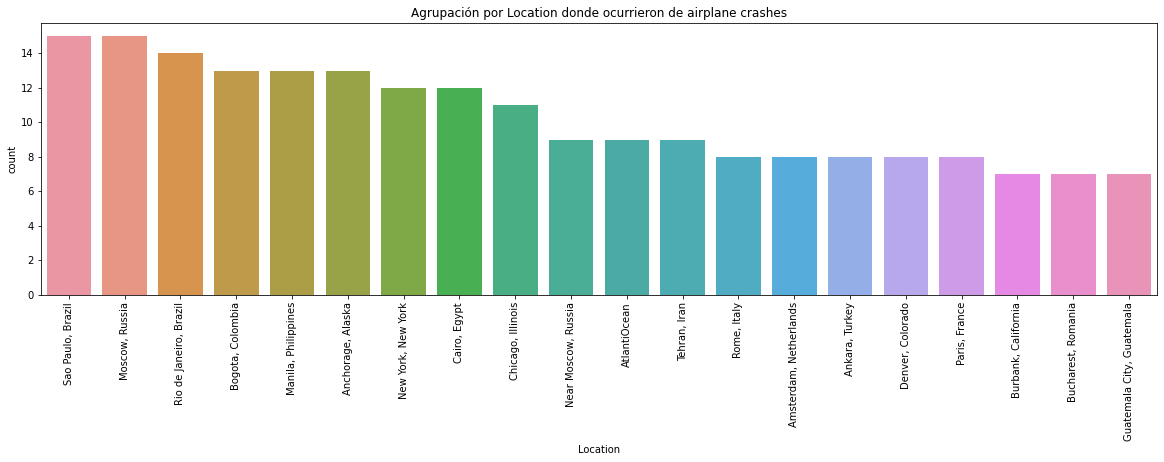

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df.Location, order=df.Location.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title(f'Agrupación por Location donde ocurrieron de airplane crashes')
plt.show()

#Analizamos las variables numericas

Realizamos una funcion donde se grafican las variables numericas

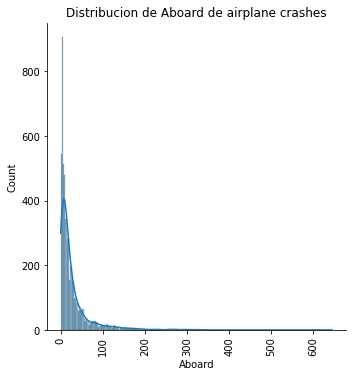

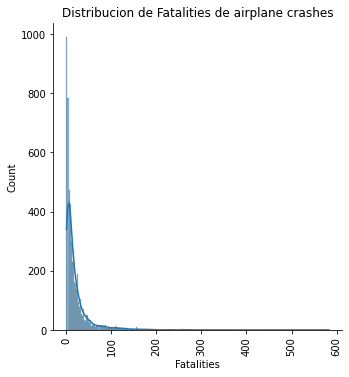

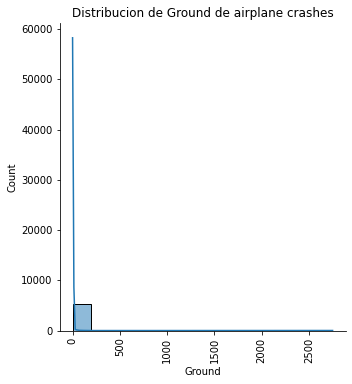

In [ ]:
def distribucion_numericas(lista):
  for j in lista:
    ax= sns.displot(data=df, x=j, kde=True)
    plt.xticks(rotation=90)
    plt.title(f'Distribucion de {j} de airplane crashes')
    plt.show()

distribucion_numericas(lista_var_num)

Calculemos el box plot de las variables numericas

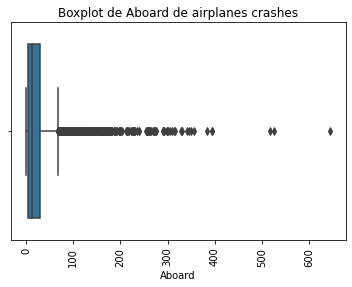

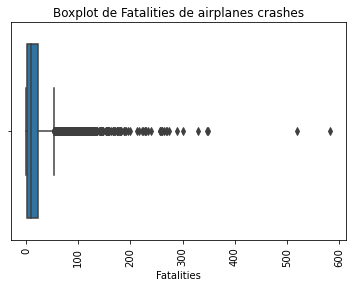

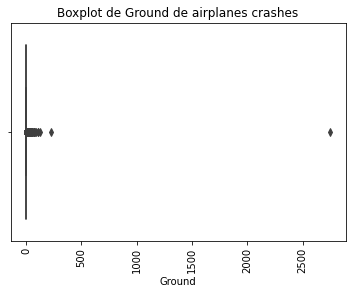

In [ ]:
def met_box_num (lista):
  for k in lista:
    ax = sns.boxplot(x=df[k])
    plt.xticks(rotation=90)
    plt.title(f'Boxplot de {k} de airplanes crashes')
    plt.show()

met_box_num(lista_var_num)

Analizamos la correlación entre las variables numericas

In [ ]:
df.corr()

,Aboard,Fatalities,Ground
Aboard,1.000000,0.757172,0.012256
Fatalities,0.757172,1.000000,0.019858
Ground,0.012256,0.019858,1.000000


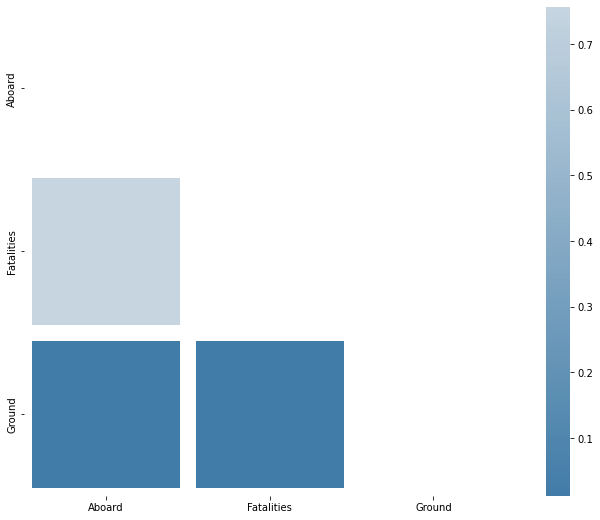

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, mask=mask, center=1,linewidths=15)

Observamos que logicamente las variables que mejor correlación tienen son Aboard y Fatalities

Realizamos un pair plot entre las variables numericas para detectar si hay algun patron 

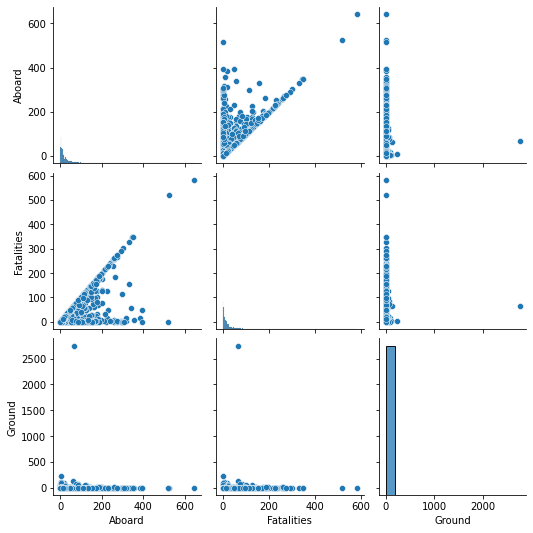

In [ ]:
sns.pairplot(data = df[['Aboard','Fatalities','Ground']])

#Que tipos de datos se puede obtener de las distintas variables

Graficamos las cantidad de muertes por año

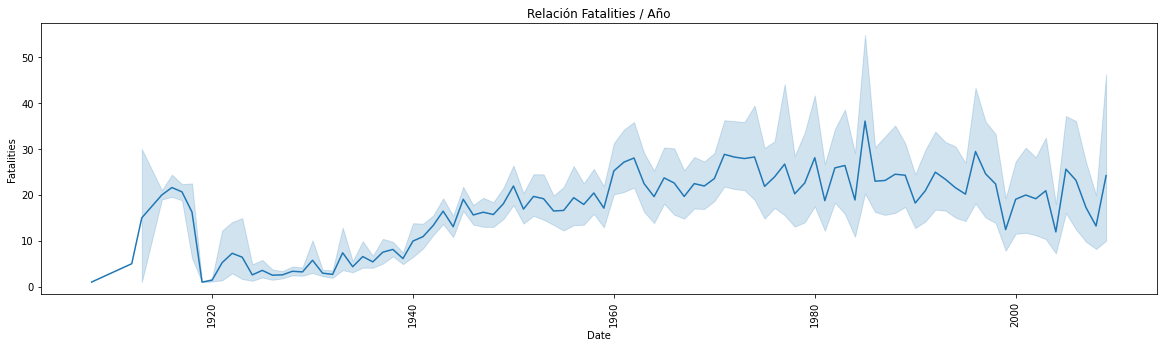

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x=df.Date.dt.year, y='Fatalities', data=df).set(title="Relación Fatalities / Año")
plt.xticks(rotation=90)
plt.show()

Analizamos la relacion de Aboard/Fatalities por año

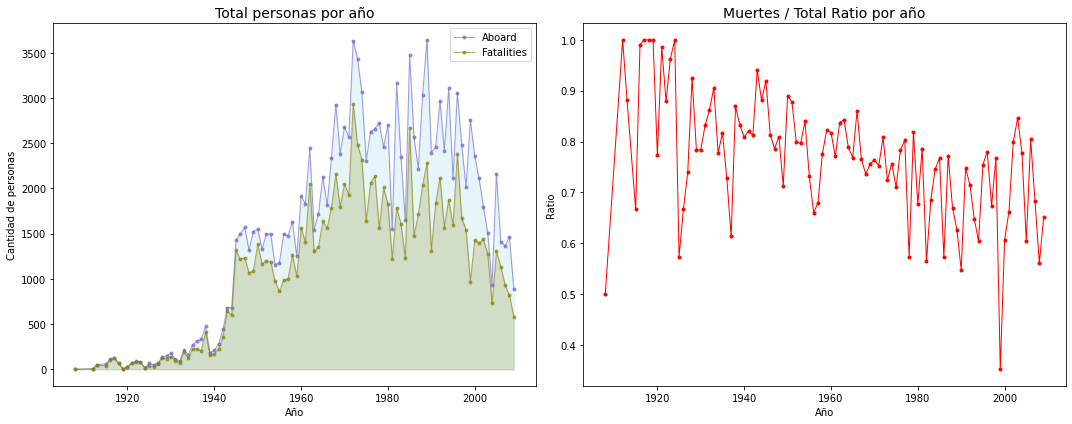

In [ ]:
Fatalities = df.groupby(df.Date.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de personas', fontsize=10)
plt.title('Total personas por año', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Muertes / Total Ratio por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

VUELOS COMERCIALES VS VUELOS MILITARES

Se crea agrega al df un columna con los años de cada accidente

In [ ]:
year = df.Date.dt.year
df.insert(1, 'year', year)

In [ ]:
df.Operator.value_counts()[:10]

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              67
Deutsche Lufthansa                      65
Air Taxi                                44
United Air Lines                        44
Military - U.S. Army Air Forces         43
Pan American World Airways              40
China National Aviation Corporation     37
Military - U.S. Navy                    36
Name: Operator, dtype: int64

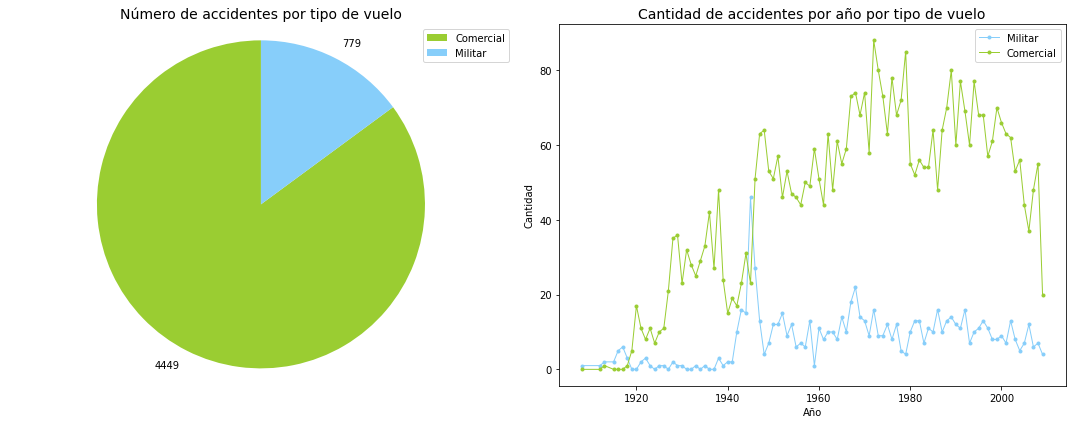

In [ ]:
df.Operator = df.Operator.str.upper() # para valores similares 'British Airlines' and 'BRITISH Airlines'
Temp = df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Comercial', 'Militar']

Temp2 = df.copy()
Temp2['Militar'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Comercial'] = Temp2.Militar == False
Temp2 = Temp2.loc[:, ['year', 'Militar', 'Comercial']]
Temp2 = Temp2.groupby(Temp2.year)[['Militar', 'Comercial']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Número de accidentes por tipo de vuelo', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Militar', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Comercial', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Cantidad de accidentes por año por tipo de vuelo', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

Obtenemos los 5 Type de aviones que mas muertes en accidentes tuvieron

In [ ]:
A = pd.DataFrame (df.groupby('Type') ['Fatalities'].sum().sort_values(ascending=False))[:5]
A

,Fatalities
Type,
Douglas DC-3,4792.0
Antonov AN-26,1068.0
Douglas DC-6B,1055.0
Douglas C-47,1046.0
McDonnell Douglas DC-9-32,951.0


Cantidad media de Fatalities por accidente

In [ ]:
df.Fatalities.mean()

20.08349218452154

Cuales fueron los accidentes con mayor cantidad de muertos

In [ ]:
df.Fatalities.sort_values(ascending=False)[:5]

2963    583.0
3568    520.0
4455    349.0
2726    346.0
3562    329.0
Name: Fatalities, dtype: float64

Verificar los 5 años que mayor cantidad de muertes *hubo*

In [ ]:
df.groupby('year')['Fatalities'].sum().sort_values(ascending=False).head(5)

year
1972    2937.0
1985    2670.0
1973    2485.0
1996    2386.0
1974    2318.0
Name: Fatalities, dtype: float64

Los Locations con mayor cantidad de accidentes

In [ ]:
pd.DataFrame(df.Location.value_counts().sort_values(ascending=False))[:10]

,Location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


Cantidad de accidentes sin victimas fatales sobre el total de accidentes



In [ ]:
df[df.Fatalities==0] ['Date'].value_counts().sum()/df.shape[1]/100

0.04142857142857143